image shape: torch.Size([160, 160, 160]), label shape: torch.Size([160, 160, 160])
Plotting slice index: 140


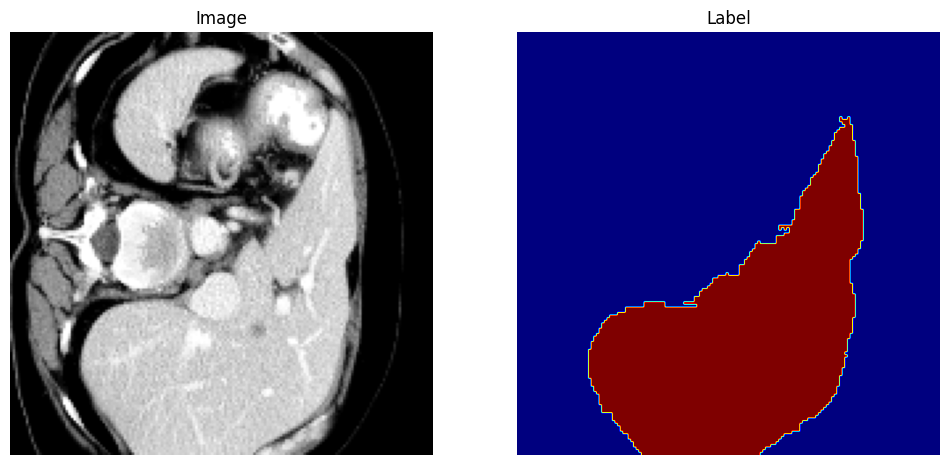

In [1]:
from preprocess import preprocess_data 
# Example usage in notebook:
# Set your directories and batch size
data_dir = 'liver_dataset/imagesTr'
labels_dir = 'liver_dataset/labelsTr'
output_dir = 'processed_data'
batch_size = 2

# Preprocess and get loaders
train_loader, val_loader = preprocess_data(
    data_dir=data_dir,
    labels_dir=labels_dir,
    output_dir=output_dir,
    batch_size=batch_size,
    check_sample=True  # Set to False to skip plotting
)

In [2]:
from train import train_model
# train the model
batch_size = 2
num_epochs = 10
learning_rate = 1e-4
ckpt_path = "checkpoints"


model = train_model(
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=num_epochs,
        learning_rate=learning_rate,
        ckpt_path=ckpt_path
    )

Using device: cuda

Epoch 1/10
1/2, train_loss: 0.6816
2/2, train_loss: 0.6320
epoch 1 average loss: 0.6568

Epoch 2/10
1/2, train_loss: 0.6298
2/2, train_loss: 0.6755
epoch 2 average loss: 0.6527

Epoch 3/10
1/2, train_loss: 0.6383
2/2, train_loss: 0.6590
epoch 3 average loss: 0.6487

Epoch 4/10
1/2, train_loss: 0.6572
2/2, train_loss: 0.6322
epoch 4 average loss: 0.6447

Epoch 5/10
1/2, train_loss: 0.6526
2/2, train_loss: 0.6284
epoch 5 average loss: 0.6405
saved new best metric model
current epoch: 5 current mean dice: 0.1385
best mean dice: 0.1385 at epoch: 5

Epoch 6/10
1/2, train_loss: 0.6623
2/2, train_loss: 0.6096
epoch 6 average loss: 0.6360

Epoch 7/10
1/2, train_loss: 0.6214
2/2, train_loss: 0.6418
epoch 7 average loss: 0.6316

Epoch 8/10
1/2, train_loss: 0.6393
2/2, train_loss: 0.6145
epoch 8 average loss: 0.6269

Epoch 9/10
1/2, train_loss: 0.5951
2/2, train_loss: 0.6493
epoch 9 average loss: 0.6222

Epoch 10/10
1/2, train_loss: 0.5890
2/2, train_loss: 0.6450
epoch 10 aver

In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [3]:
from evaluate import evaluate_model
evaluate_model(
    ckpt="checkpoints/best_metirc_model.pth",
    data_dir="liver_dataset/imagesTs",
    labels_dir="liver_dataset/labelsTs",
    device=device,
    batch_size=1
    )


Metric on original image spacing:  0.05527745932340622


2025-05-23 07:21:25,031 INFO image_writer.py:197 - writing: out\liver_8\liver_8_seg.nii.gz


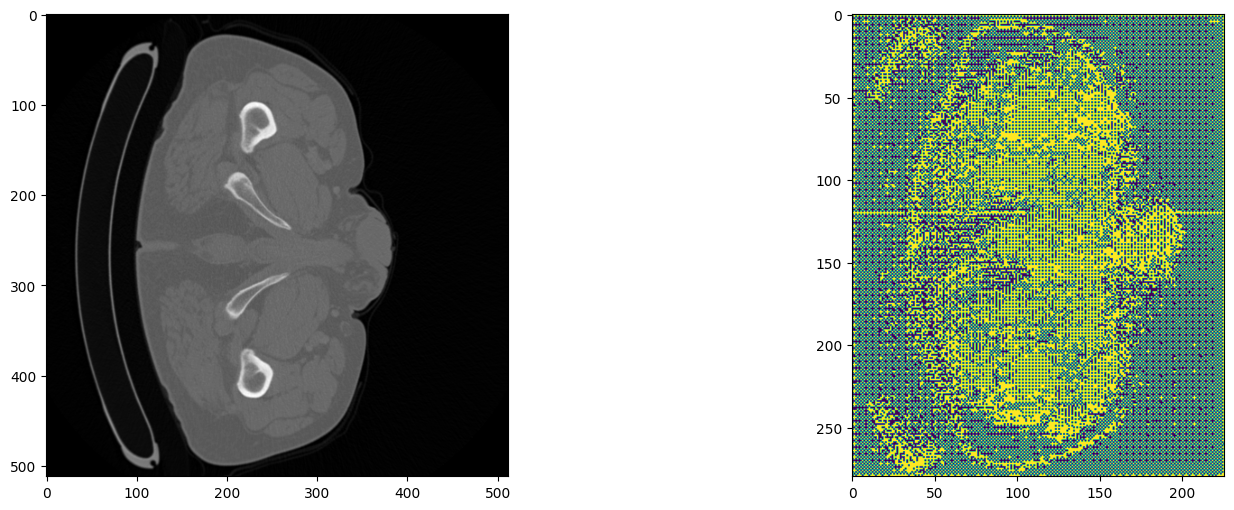

In [1]:
from inference import run_inference

run_inference("checkpoints/best_metirc_model.pth","liver_dataset/imagesTs/liver_8.nii.gz" , "none")
